<a href="https://colab.research.google.com/github/AyrllanP/PISI-3/blob/dev-2/Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificando base de dados de estilo de vida e Bem-estar
## 1. Contexto
Hábitos diários e características relacionadas ao estilo de vida podem influencicar fitetamente no nível de estresse diário...

# K-nearest neighbors (KNN)
### Algoritmo KNN com base de dados de estilo de vida e bem-estar
Implementação de algoritmo KNN utilizando dataset de [Estilo de vida e Bem-estar](https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data) disponível no Kaggle, seguindo etapas:


1. Carregamento da base de dados
2. Pré-processamento
3. Treinamento e Avaliação do Modelo
4. Visualização de métricas e desempenho




In [ ]:
import pandas as pd

file_url = "https://raw.githubusercontent.com/AyrllanP/PISI-3/main/Wellbeing_and_lifestyle_data_Kaggle.csv"
df = pd.read_csv(file_url)
df.head()


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


## Pré processamento


* Verificação de valores nuls
* Substituição de erros de tipo de objetos pela mediana dos demais



In [ ]:

df.isnull().sum()
# Substituindo string da coluna 'DAILY_STRESS' por um valor numérico correspondente a mediana dos demais valores
df['DAILY_STRESS'] = df['DAILY_STRESS'].replace("1/1/00", 3)
df['DAILY_STRESS'] = df['DAILY_STRESS'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  int64  
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

## Treinamento e avaliação do modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


X = df[["GENDER", "AGE", "WORK_LIFE_BALANCE_SCORE", "SLEEP_HOURS", "DAILY_STEPS", "FRUITS_VEGGIES", "PERSONAL_AWARDS", "TIME_FOR_PASSION", "SUFFICIENT_INCOME", "PLACES_VISITED", "CORE_CIRCLE", "SUPPORTING_OTHERS", "SOCIAL_NETWORK", "ACHIEVEMENT", "DAILY_SHOUTING", "WEEKLY_MEDITATION", "BMI_RANGE", "TODO_COMPLETED", "FLOW", "LOST_VACATION"]]
# Convertendo sexo para valores em números
X["GENDER"] = X["GENDER"].replace("Male", 0)
X["GENDER"] = X["GENDER"].replace("Female", 1)
# Convertendo Faixa etária para valores em números
X["AGE"]= X["AGE"].map({ 'Less than 20': 0, '21 to 35': 1, '36 to 50': 2, '51 or more': 3})

# Target
y = df["DAILY_STRESS"]

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


<ipython-input-13-f5c62fa5328f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["GENDER"] = X["GENDER"].replace("Male", 0)
<ipython-input-13-f5c62fa5328f>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["GENDER"] = X["GENDER"].replace("Female", 1)
<ipython-input-13-f5c62fa5328f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

((12777, 20), (3195, 20))

## Vizualização e métricas de desempenho

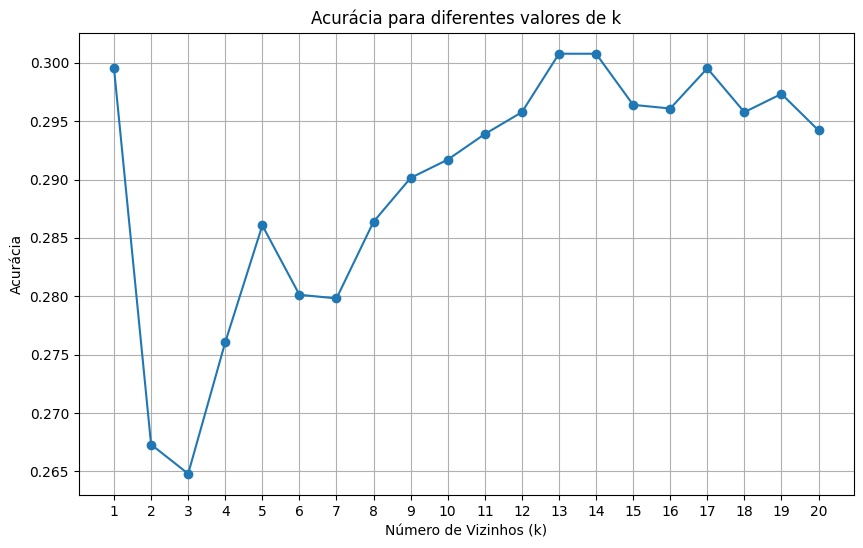

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Testando diferentes valores de k
accuracies = []
for k in range(1, 21):  # Teste para k de 1 a 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotando a acurácia para diferentes valores de k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o')
plt.xticks(range(1, 21))
plt.title("Acurácia para diferentes valores de k")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia")
plt.grid()
plt.show()

In [ ]:
# Calculando métricas por classe
class_errors = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
class_totals = conf_matrix.sum(axis=1)
error_rates = class_errors / class_totals

# Exibindo a taxa de erro por classe
for i, error_rate in enumerate(error_rates):
    print(f"Classe {i}: Taxa de Erro = {error_rate:.2f}")

Classe 0: Taxa de Erro = 0.91
Classe 1: Taxa de Erro = 0.71
Classe 2: Taxa de Erro = 0.64
Classe 3: Taxa de Erro = 0.62
Classe 4: Taxa de Erro = 0.79
Classe 5: Taxa de Erro = 0.86


In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicando SMOTE no conjunto de treinamento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Treinando novamente o KNN com os dados balanceados
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)
y_pred = knn.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Acurácia: 0.30

Matriz de Confusão:
 [[  4  47  36  38   8   3]
 [ 10 141 136 172  30   4]
 [  6 116 249 248  73  14]
 [  2 105 242 402  90  32]
 [  0  50 143 243 114  22]
 [  2  21  75 169  97  51]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.17      0.03      0.05       136
           1       0.29      0.29      0.29       493
           2       0.28      0.35      0.31       706
           3       0.32      0.46      0.37       873
           4       0.28      0.20      0.23       572
           5       0.40      0.12      0.19       415

    accuracy                           0.30      3195
   macro avg       0.29      0.24      0.24      3195
weighted avg       0.30      0.30      0.28      3195



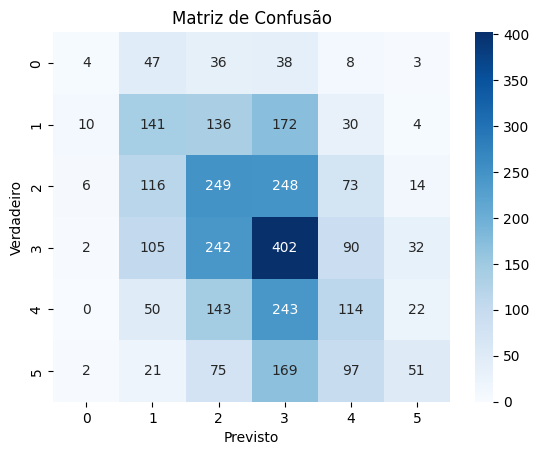

In [ ]:
# Treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

# Previsões
y_pred = knn.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Exibindo as métricas de avaliação
print(f"Acurácia: {accuracy:.2f}")
print("\nMatriz de Confusão:\n", conf_matrix)
print("\nRelatório de Classificação:\n", class_report)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()

Um k com valor de 15 ou 13 parecem melhor para esse modelo. Porem a acurácia tem um valor muito baixo de cerca de 30% o que indica que não está captando bem os padrões do dataset

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
file_url = "https://raw.githubusercontent.com/AyrllanP/PISI-3/main/Wellbeing_and_lifestyle_data_Kaggle.csv"
habitos = pd.read_csv(file_url)
habitos.head()


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


## Pré processamento

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Substituindo valores não numéricos
habitos["DAILY_STRESS"] = habitos["DAILY_STRESS"].replace("1/1/00", 3)
habitos["DAILY_STRESS"] = habitos["DAILY_STRESS"].astype(int)

print(habitos.columns)
# # Remoção de colunas irrelevantes
habitos = habitos.drop(["Timestamp"], axis=1, errors='ignore')

# Codificação de variáveis categóricas
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['GENDER', 'AGE'])], remainder='passthrough')
X = np.array(ct.fit_transform(habitos.drop('DAILY_STRESS', axis=1)))
y = habitos['DAILY_STRESS']


Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')


## Treinamento e avaliação do modelo

In [ ]:
# Treinando o Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
# Previsões
y_pred = rf_classifier.predict(X_test)

#Relatório de classificação
target_names = ['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5', 'Classe 6']
print("Resultados do Conjunto de Teste (Random Forest):")
print(classification_report(y_test, y_pred, target_names=target_names))

# Acurácia do Random Forest
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Random Forest: {accuracy:.2f}')

Resultados do Conjunto de Teste (Random Forest):
              precision    recall  f1-score   support

    Classe 1       0.71      0.09      0.16       136
    Classe 2       0.40      0.35      0.38       493
    Classe 3       0.34      0.30      0.32       706
    Classe 4       0.35      0.57      0.43       873
    Classe 5       0.33      0.24      0.28       572
    Classe 6       0.46      0.29      0.36       415

    accuracy                           0.36      3195
   macro avg       0.43      0.31      0.32      3195
weighted avg       0.38      0.36      0.35      3195

Acurácia do Random Forest: 0.36


Matriz de Confusão:
[[ 12  41  25  47   7   4]
 [  1 174 138 147  25   8]
 [  2 104 212 300  67  21]
 [  2  78 152 497  98  46]
 [  0  25  55 290 140  62]
 [  0  12  33 156  92 122]]


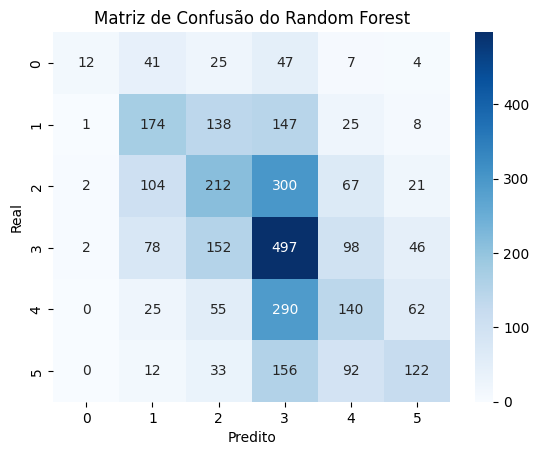

In [ ]:
# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão do Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

Acurácia tambem está baixa